## 01 R에 대한 소개와 R Studio 사용법

### 01. R에 대한 소개

- R이란?
  - R은 자료 분석, 계산, 시각화를 위한 통합 통계 소프트웨어이다.
  - 장점: 공짜, 플랫폼 무관
  - 단점: 스크립트 언어라 속도가 느리다.

In [1]:
# Working Directory 정의
setwd("D:\\Workspace\\KNOU\\[5-2]베이지안통계학")

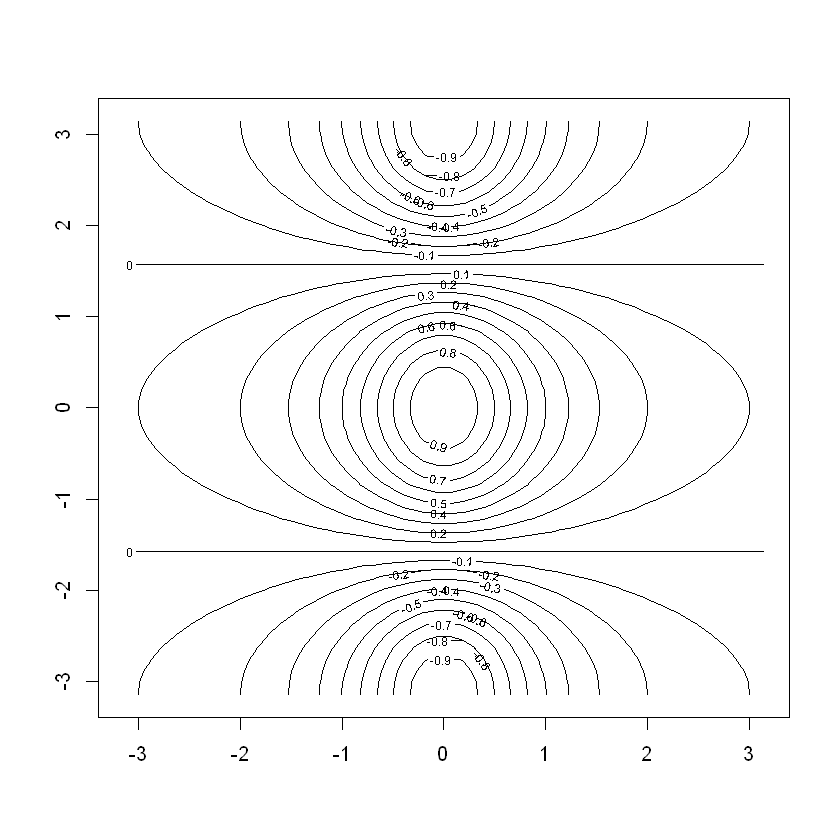

In [2]:
## ------------------------------------------------------------------------
# 등고선그림 그리기 
x <- seq(-pi, pi, len=50) 
y <- x
f <- outer(x, y, function(x, y) cos(y)/(1 + x^2))
contour(x, y, f) 
contour(x, y, f, nlevels=15, add=TRUE)

### 02. R Studio 소개

- 이항모형 실습 

[문제]
1) 모형: <img src="https://latex.codecogs.com/svg.image?&space;X\sim&space;Bin(n,\theta),\;\;\;\theta\in(0,1)">
2) 사전분포: <img src="https://latex.codecogs.com/svg.image?\theta\sim&space;Beta(\alpha,\beta),\;\;\;\alpha,\beta>0">
3) 사후분포: <img src="https://latex.codecogs.com/svg.image?\theta|x\sim&space;Beta(\alpha+x,\beta+n-x)">

위의 모형에서 n=10 일때, X=3을 관측하였다.
이 때, 사전분포, 사후분포, 가능도를 한 그림에 그리고 레전드를 넣으시오.

In [3]:
# 파라미터 값 대입
alpha = 1
beta = 1
n = 10
x = 3

In [4]:
# 사전분포, 사후분포의 밀도함수, 가능도 계산 
theta = seq(from=0,to=1,length=100)
prior.den = dbeta(theta, alpha, beta)
post.den = dbeta(theta, alpha+x, beta+n-x)
likelihood = dbinom(x, size=n, prob=theta)
likelihood = 100*likelihood/sum(likelihood)

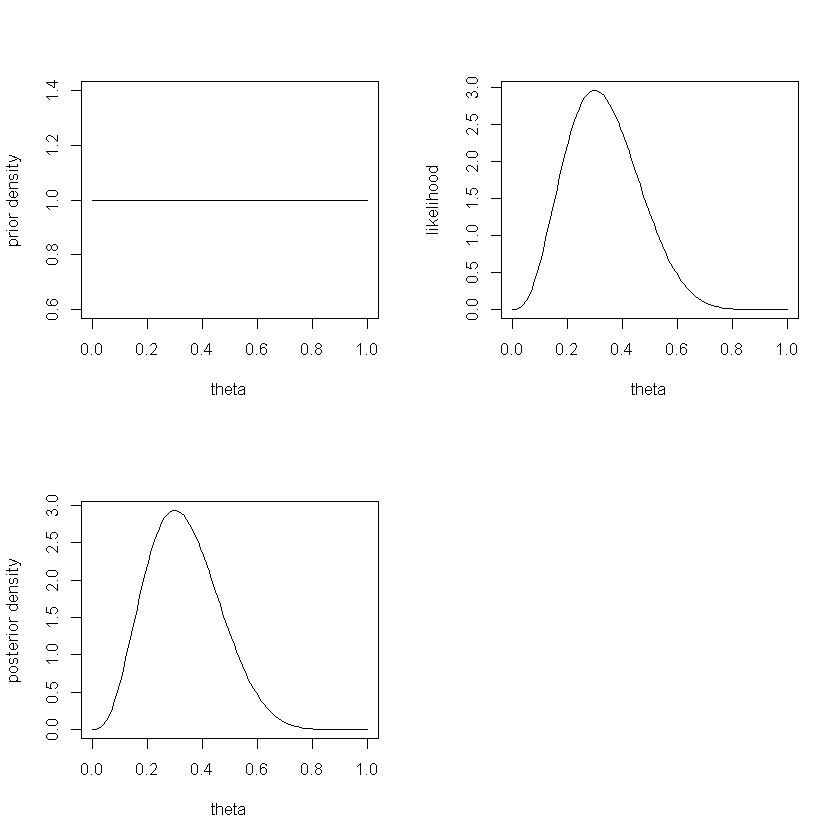

In [5]:
# 밀도함수들 그리기 
par(mfrow=c(2,2))
plot(theta, prior.den, type="l", ylab="prior density")
plot(theta, likelihood, type="l", ylab="likelihood")
plot(theta, post.den, type="l", ylab="posterior density")
par(mfrow=c(1,1))

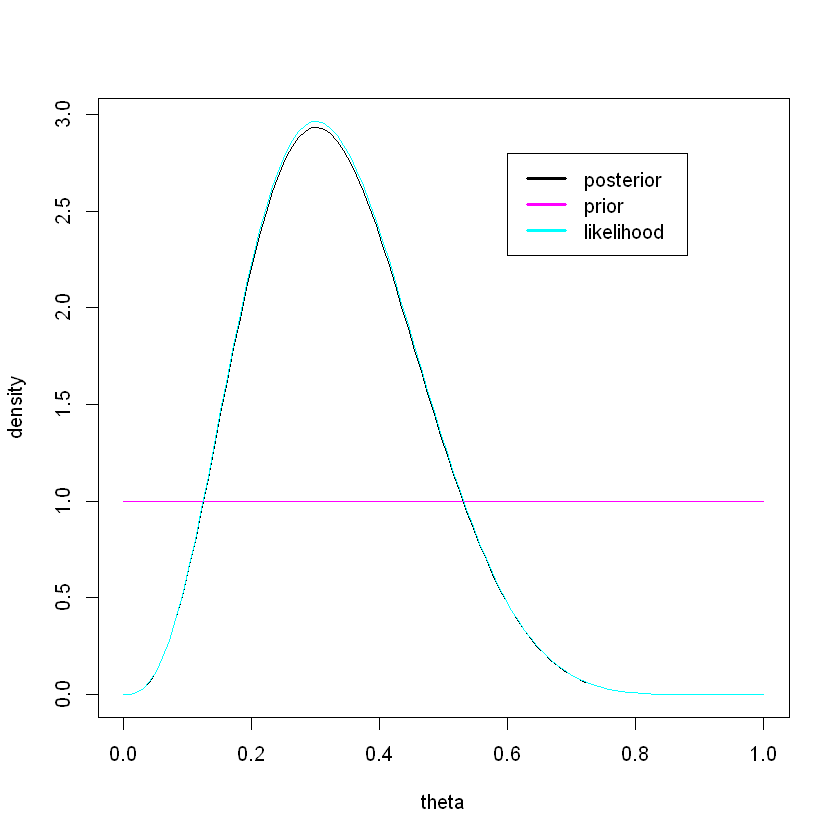

In [6]:
# 한 개의 윈도우에 세 개의 함수들을 그리기 
ymax = max(prior.den, likelihood, post.den)
plot(theta, post.den, type="l", ylab="density", ylim=c(0,ymax))
lines(theta, prior.den, col="magenta")
lines(theta, likelihood, col="cyan")
legend(0.6,2.8,  c("posterior","prior", "likelihood"), lty=c(1,1,1),
          lwd=c(2.5,2.5),col=c("black","magenta","cyan"))

[문제] 점추정 구간추정 실습
1) 위에 주어진 모형에 대하여, 사후분포의 평균, 중앙값, 최빈값, 표준편차, 2.5%와 97.5% 백분위수를 구하시오.
2) 사후분포의 밀도함수를 그리고, 위의 값들을 사후분포 밀도함수 위에 그리시오.

In [7]:
# 사후분포의 요약통계량 구하기 
post.summary = numeric(6)
names(post.summary) = c("post mean", "post median", "MAP", "post sd", "2.5%", "97.5%")
post.summary["post mean"] = (alpha+x)/(alpha + beta + n)
post.summary["post median"] = qbeta(0.5, alpha+x, beta + n-x) 
post.summary["MAP"] = (alpha+x-1)/(alpha + beta + n-2)
post.summary["post sd"] = sqrt( (alpha+x)*(beta+n-x)/((alpha+beta+n)^2 *(alpha+beta+n+1)))
post.summary["2.5%"] = qbeta(0.025, alpha+x, beta + n-x) 
post.summary["97.5%"] = qbeta(0.975, alpha+x, beta + n-x) 
post.summary

post mean post median         MAP     post sd        2.5%       97.5% 
  0.3333333   0.3238045   0.3000000   0.1307441   0.1092634   0.6097426

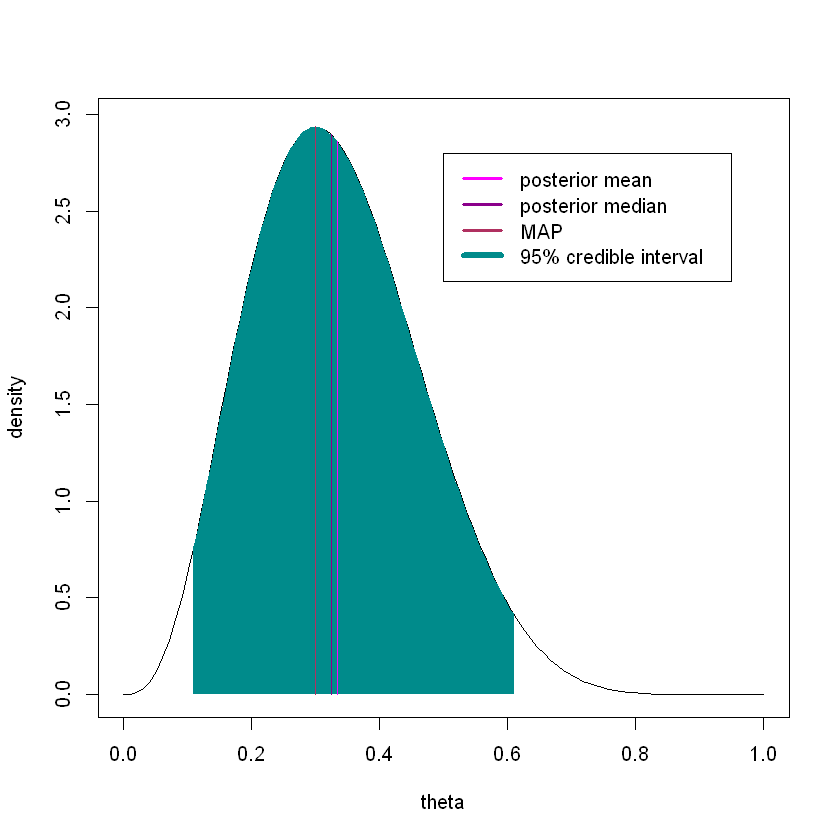

In [8]:
# 요약통계량들을 그림으로 그리기 
plot(theta, post.den, type="l", ylab="density", ylim=c(0, ymax))
xpts1 = seq(f=post.summary["2.5%"], t=post.summary["97.5%"], len=100)
xpts = c(xpts1, xpts1[100:1])
ypts1 = dbeta(xpts1, alpha+x, beta+n-x)
ypts = c(rep(0,100), ypts1[100:1])
polygon(x = xpts, y = ypts, col = "cyan4", border = NA, fillOddEven=TRUE)
lines(x=rep(post.summary["post mean"], 2), 
	y=c(0,dbeta(post.summary["post mean"],alpha+x, beta+n-x)), col="magenta")
lines(x=rep(post.summary["post median"], 2), 
	y=c(0,dbeta(post.summary["post median"],alpha+x, beta+n-x)), col="magenta4")
lines(x=rep(post.summary["MAP"], 2), 
	y=c(0,dbeta(post.summary["MAP"],alpha+x, beta+n-x)), col="maroon")
legend(0.5, 2.8, c("posterior mean","posterior median", "MAP", "95% credible interval"),        
	lty=c(1,1,1, 1), lwd=c(2.5,2.5, 2.5, 5), 
	col=c("magenta","magenta4","maroon", "cyan4"))

In [10]:
## ------------------------------------------------------------------------
# 이항분포의 가설검정

theta0 = 0.5
pi0 = 0.5
pi1 = 0.5
alpha = 0.5
beta = 0.5
n= 10
x = 3


## ------------------------------------------------------------------------
log.m1 = lgamma(n+1) -lgamma(x+1) - lgamma(n-x+1)- 
	lbeta(alpha, beta) + lbeta(alpha+x, beta+n-x)
m1 = exp(log.m1)
B10 = exp(log.m1-dbinom(x=x, size=n, prob=theta0, log=TRUE))
B01 = 1/B10
alpha0 = 1/(1+B10*pi1/pi0)
alpha1 = 1 - alpha0

bayes.test = numeric(4)
names(bayes.test) = c("B10", "B01", "post prob of H0", "post prob of H1")
bayes.test["B10"] = B10
bayes.test["B01"] = B01
bayes.test["post prob of H0"] = alpha0
bayes.test["post prob of H1"] = alpha1

bayes.test

B10             B01 post prob of H0 post prob of H1 
      0.5585938       1.7902098       0.6416040       0.3583960